# 이변량_범주 vs 숫자

## 1.환경준비

### (1) 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### (2) 데이터 불러오기
* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [4]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


범주별 숫자를 비교할 때 사용되는 방식은 **범주별 평균 비교** 입니다.  


## 2.시각화
titanic data에서 Age를 Y로 두고 비교해 봅시다.

### (1) 평균 비교 : barplot

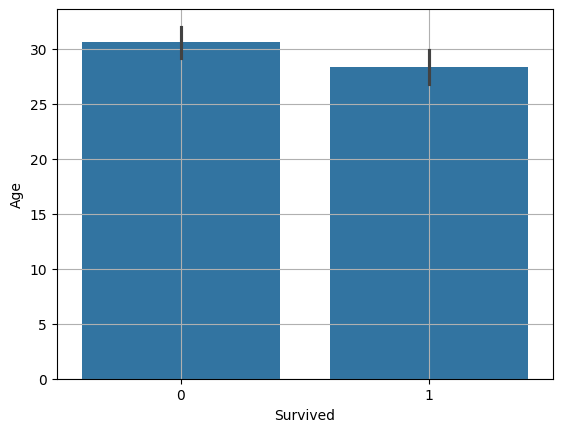

In [6]:
sns.barplot(x="Survived", y="Age", data=titanic)
plt.grid()
plt.show()
# 검은색 바는 95% 신뢰구간을 의미한다 , 아래 그래프는 생존자별 AGE는 신뢰구간 안에 있

In [36]:
titanic.loc[:10, ['Survived','Age']]

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0


위 두 범주간에 평균에 차이가 있나요?

In [ ]:
# 차이가 있긴 하나 매우 미비합 = 없다고 볼 수 있음 

### (2) (추가) boxplot

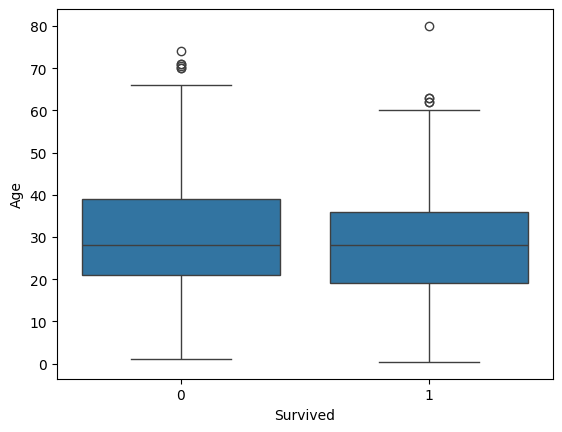

In [39]:
sns.boxplot(x='Survived', y = 'Age', data = titanic)
plt.show()

## 3.수치화

### (1) t-test

두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test와 양측검정만 다룹니다.
* 우리는 X --> Y의 관계에서 ,두 변수간에 관련이(차이가) 있는지, 없는지를 확인하는 것이 제일 중요하기 때문입니다.

* 주의사항 : 데이터에 NaN이 있으면 계산이 안됩니다. .notnull() 등으로 NaN을 제외한 데이터를 사용해야 합니다.

* t 통계량
    * 두 평균의 차이를 표준오차로 나눈 값.
    * 기본적으로는 두 평균의 차이로 이해해도 좋습니다.
    * 우리의 가설(대립가설)은 차이가 있다는 것이므로, t 값이 크던지 작던지 하기를 바랍니다.
    * 보통, t 값이 -2보다 작거나, 2보다 크면 차이가 있다고 봅니다.

* 이번엔 타이타닉 데이터로 시도해 봅시다.
    * 생존여부 --> Age : 생존여부 별로 나이에 차이가 있을것이다.


#### 1) 데이터 준비

In [41]:
# 먼저 NaN이 있는지 확인해 봅시다.
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]

In [45]:
# 두 그룹으로 데이터 저장
died = temp.loc[temp['Survived']==0, 'Age']
survived = temp.loc[temp['Survived']==1, 'Age']

#### 2) t-test

In [48]:
spst.ttest_ind(died, survived) # 0.05 이하이긴 한데  생존자와 사망자의 연령 평균에 차이가 없음(99% 신뢰구간이라면 )

TtestResult(statistic=2.06668694625381, pvalue=0.03912465401348249, df=712.0)

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] 성별에 따라 운임에 차이가 있을 것이다.
    * 시각화와 수치화로 확인해 봅시다.

In [16]:
# 데이터 확인 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='Fare'>

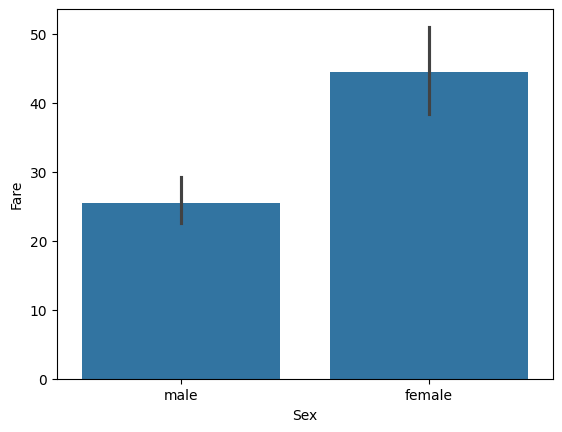

In [26]:
temp = titanic.loc[titanic['Sex'].notnull()]
male_fare  = temp.loc[temp['Sex']=='male', 'Fare']
female_fare = temp.loc[temp['Sex']=='female', 'Fare']

sns.barplot(x="Sex", y="Fare", data=titanic)

In [34]:
spst.ttest_ind(male_fare, female_fare) # 여성의 운임료가 더 비쌈?  

TtestResult(statistic=5.529140269385719, pvalue=4.2308678700429995e-08, df=889.0)

* [문2] 생존여부에 따라 운임에 차이가 있을 것이다.
    * 시각화와 수치화로 확인해 봅시다.

<Axes: xlabel='Survived', ylabel='Fare'>

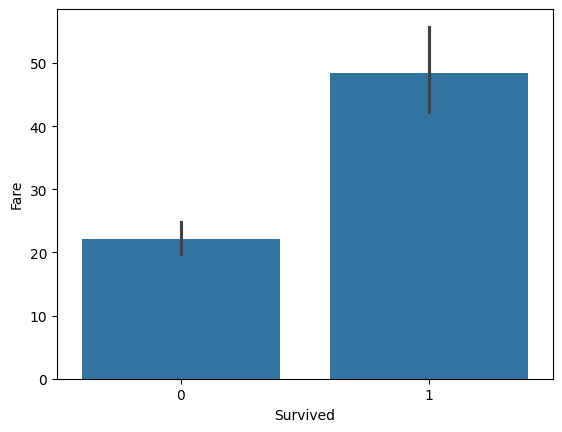

In [30]:
temp = titanic.loc[titanic['Survived'].notnull()]
dead  = temp.loc[temp['Survived']==0, 'Fare']
alive = temp.loc[temp['Survived']==1, 'Fare']

sns.barplot(x="Survived", y="Fare", data=titanic)

In [32]:
spst.ttest_ind(dead, alive) # 생존자들의 운임료가 더 비쌌음 = 더 좋은 객실을 사용

TtestResult(statistic=-7.939191660871055, pvalue=6.120189341924198e-15, df=889.0)

### (2) anova


* 분산 분석 **AN**alysis **O**f **VA**riance
* 여러 집단 간에 차이는 어떻게 비교할 수 있을까요?
* 여기서 기준은 전체 평균 입니다.
* 𝐹 통계량 =
    * (집단 간 분산)/(집단 내 분산) = (전체 평균 − 각 집단 평균)/(각 집단의 평균 − 개별 값)
    * 값이 대략 2~3 이상이면 차이가 있다고 판단합니다.

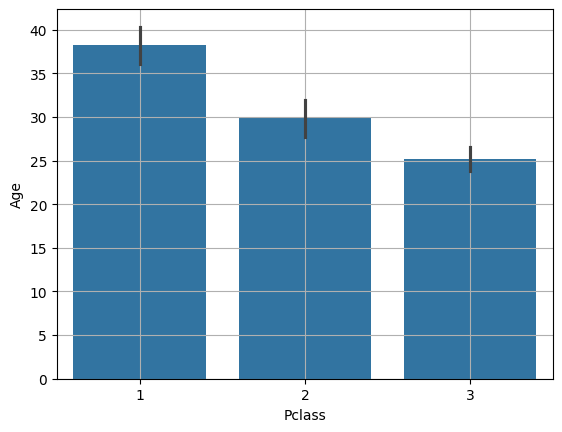

In [50]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.grid()
plt.show()

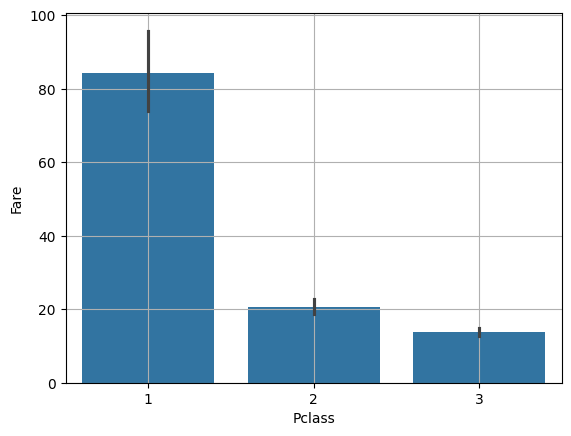

In [82]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Fare", data=titanic)
plt.grid()
plt.show()

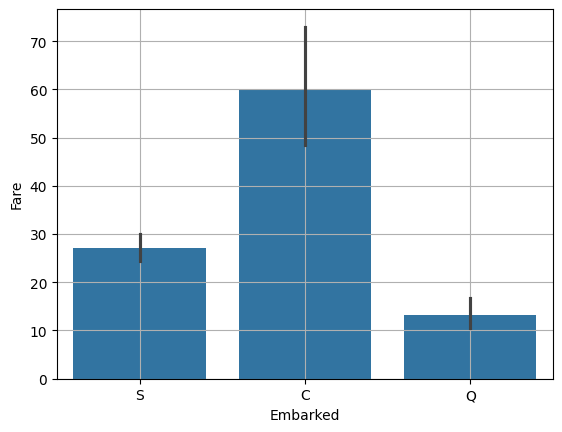

In [84]:
# Pclass(3 범주) --> Age
sns.barplot(x="Embarked", y="Fare", data=titanic)
plt.grid()
plt.show()

#### 1) 데이터 준비

In [52]:
# 1) 분산 분석을 위한 데이터 만들기
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

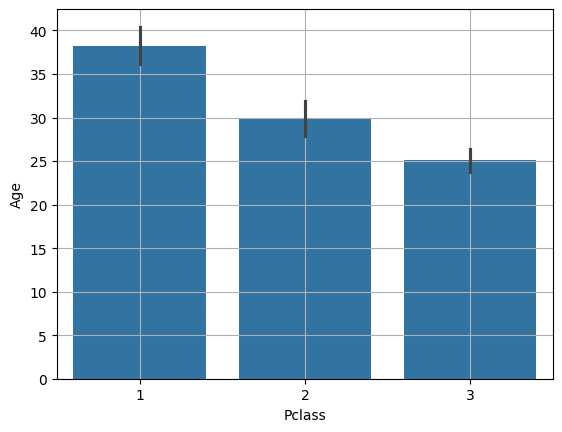

In [86]:
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.grid()
plt.show()

#### 2) anova

In [54]:
spst.f_oneway(P_1, P_2, P_3)
# 전체 평균 vs 그룹 평균 분산량 차이는 약 57배 이다 

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] 승선지역(Embarked)별로 운임에 차이가 있을 것이다.
    * 시각화와 수치화로 확인해 봅시다.

In [70]:
temp = titanic.loc[titanic['Embarked'].notnull()]
print(temp['Embarked'].value_counts())
# 그룹별 저장


F_1 = temp.loc[temp.Embarked == 'S', 'Fare']
F_2 = temp.loc[temp.Embarked == 'C', 'Fare']
F_3 = temp.loc[temp.Embarked == 'Q', 'Fare']

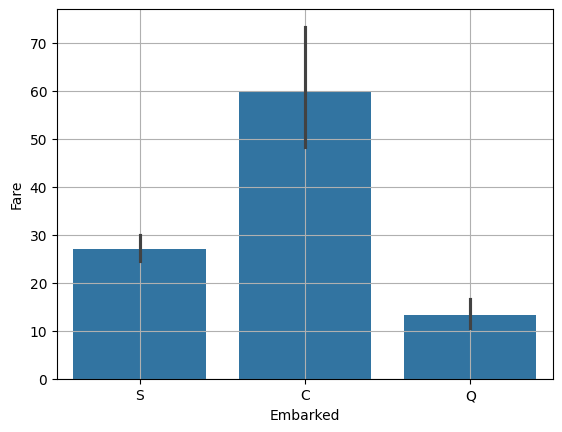

In [90]:
sns.barplot(x="Embarked", y="Fare", data=titanic)
plt.grid()
plt.show()

In [72]:
spst.f_oneway(F_1, F_2, F_3)
# 전체 평균 vs 그룹 평균 분산량 차이는 약 38배 이다 

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)

* [문2] 객실등급(Pclass)별로 운임에 차이가 있을 것이다.
    * 시각화와 수치화로 확인해 봅시다.

In [78]:
temp = titanic.loc[titanic['Pclass'].notnull()]
print(temp['Pclass'].value_counts())
# 그룹별 저장


P_1 = temp.loc[temp.Pclass == 1, 'Fare']
P_2 = temp.loc[temp.Pclass == 2, 'Fare']
P_3 = temp.loc[temp.Pclass == 3, 'Fare']

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


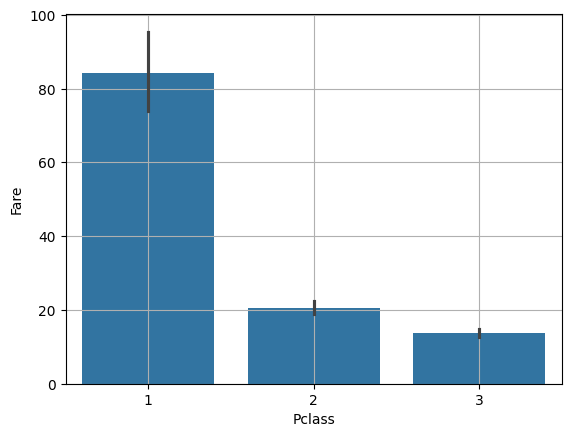

In [88]:
sns.barplot(x="Pclass", y="Fare", data=titanic)
plt.grid()
plt.show()

In [80]:
spst.f_oneway(P_1, P_2, P_3)
# 전체 평균 vs 그룹 평균 분산량 차이는 약 242배 이다 

F_onewayResult(statistic=242.34415651744814, pvalue=1.0313763209141171e-84)

## 4.복습문제

air quality 데이터셋으로 다음 문제를 풀어 봅시다.

* 라이브러리 불러오기

In [92]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터불러오기

In [94]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air['Weekend'] = np.where(air['Weekday'] >=5, 1, 0)
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday,Weekend
0,41,190.0,7.4,67,1973-05-01,5,1,0
1,36,118.0,8.0,72,1973-05-02,5,2,0
2,12,149.0,12.6,74,1973-05-03,5,3,0
3,18,313.0,11.5,62,1973-05-04,5,4,0
4,19,NaN,14.3,56,1973-05-05,5,5,1


* 1) 주말여부(Weekend) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

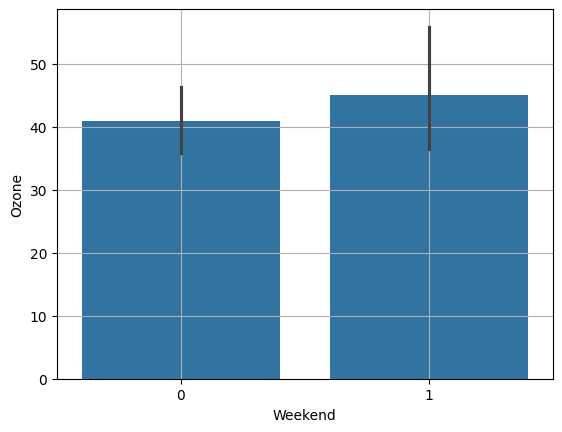

In [116]:
sns.barplot(x='Weekend',y='Ozone',data=air)
plt.grid()
plt.show()

In [108]:
# 두 그룹으로 데이터 저장
weekday = air.loc[air['Weekend']==0, 'Ozone']
weekend = air.loc[air['Weekend']==1, 'Ozone']

spst.ttest_ind(weekday, weekend) # t-test 가설검정 
#평일과 주말에 오존농도에는 차이가 없다(귀무가설 채택) 

TtestResult(statistic=-0.7671489829911908, pvalue=0.4441907648291733, df=151.0)

* 2) 요일(Weekday) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

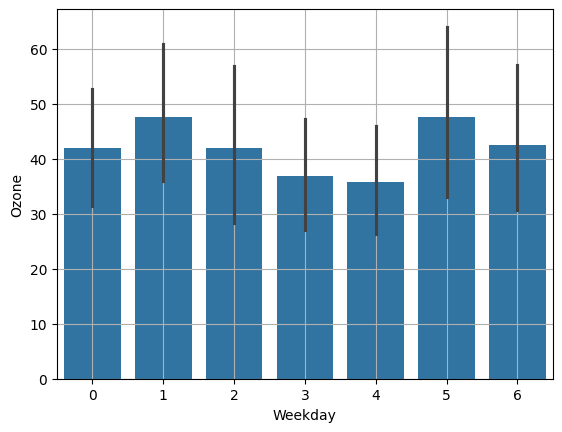

In [118]:
sns.barplot(x='Weekday',y='Ozone',data=air)
plt.grid()
plt.show()

In [112]:
# 집단내 여러 표본 내 차이가 있다 없다 판별: Avova 분석
p0=air.loc[air['Weekday']==0,'Ozone']
p1=air.loc[air['Weekday']==1,'Ozone']
p2=air.loc[air['Weekday']==2,'Ozone']
p3=air.loc[air['Weekday']==3,'Ozone']
p4=air.loc[air['Weekday']==4,'Ozone']
p5=air.loc[air['Weekday']==5,'Ozone']
p6=air.loc[air['Weekday']==6,'Ozone']

spst.f_oneway(p0,p1,p2,p3,p4,p5,p6)

F_onewayResult(statistic=0.5098923426664418, pvalue=0.8001433644111904)

* 3) 월(Month) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

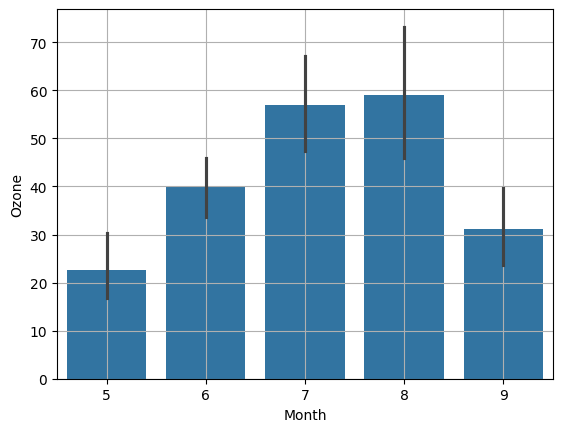

In [120]:
sns.barplot(x='Month',y='Ozone',data=air)
plt.grid()
plt.show()

In [114]:
# 집단내 여러 표본 내 차이가 있다 없다 판별: Avova 분석
m5=air.loc[air['Month']==5,'Ozone']
m6=air.loc[air['Month']==6,'Ozone']
m7=air.loc[air['Month']==7,'Ozone']
m8=air.loc[air['Month']==8,'Ozone']
m9=air.loc[air['Month']==9,'Ozone']


spst.f_oneway(m5,m6,m7,m8,m9)
# 월별 오존 농도에는 차이가 있다(귀무가설 기각, 대립가설 채택 )

F_onewayResult(statistic=10.702965130677123, pvalue=1.2027079954529325e-07)